# XGB MODEL

#### LIBRARY IMPORT

In [1]:
import os
import cv2
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt


#### DIRECTORY IMPORT

In [2]:

train_dir = 'C:\\Users\\DELL\\Documents\\Amrita\\Codes\\Sem_5_Codes\\Covid19-dataset\\train\\'
test_dir= 'C:\\Users\\DELL\\Documents\\Amrita\\Codes\\Sem_5_Codes\\Covid19-dataset\\test\\'

augmented_train_dir_one_in_one = 'C:\\Users\\DELL\\Documents\\Amrita\\Codes\\Sem_5_Codes\\Covid19-dataset\\augmented_train_one_in_one'


if not os.path.exists(augmented_train_dir_one_in_one):
    os.makedirs(augmented_train_dir_one_in_one)
    

In [3]:
target_size=(256,256)

#### ONE IN ONE

In [4]:

def augmenter1(input_path, output_dir):  #augmenter1= onepic will have three diff alter-egos 
    unresized_image = cv2.imread(input_path)
    image = cv2.resize(unresized_image, target_size)

    noisy_image = image.copy()
    rotated_image = image.copy()
    flipped_image = image.copy()

    noise = np.random.normal(0, 25, noisy_image.shape).astype(np.uint8)
    noisy_image = cv2.add(noisy_image, noise)

    angle = 15
    height, width = rotated_image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
    rotated_image = cv2.warpAffine(rotated_image, rotation_matrix, (width, height))

    flipped_image = cv2.flip(flipped_image, 1)

    base_filename = os.path.splitext(os.path.basename(input_path))[0]
    cv2.imwrite(os.path.join(output_dir, f'{base_filename}_noise.jpg'), noisy_image)
    cv2.imwrite(os.path.join(output_dir, f'{base_filename}_rotate.jpg'), rotated_image)
    cv2.imwrite(os.path.join(output_dir, f'{base_filename}_flip.jpg'), flipped_image)

types = ['Covid', 'Normal']

for i in types:
    train_dir_path = os.path.join(train_dir, i)
    aug_path = os.path.join(augmented_train_dir_one_in_one, i)  
    if not os.path.exists(aug_path):
        os.makedirs(aug_path)
    for root, dirs, files in os.walk(train_dir_path):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')): 
                image_path = os.path.join(root, file)
                augmenter1(image_path, aug_path)


### image to vector form conversion function

##### ONE IN ONE

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [6]:
train_dir = augmented_train_dir_one_in_one


feature_vectors = []
labels = []

for label in os.listdir(train_dir):
    label_dir = os.path.join(train_dir, label)
    for image_name in os.listdir(label_dir):
        image_path = os.path.join(label_dir, image_name)
        image = cv2.imread(image_path)


        feature_vector = image.flatten()
        feature_vectors.append(feature_vector)
        labels.append(0 if label == 'Covid' else 1)

X_train = np.array(feature_vectors)
y_train = np.array(labels)

feature_vectors1 = []
labels1 = []

for label in os.listdir(test_dir):
    label_dir = os.path.join(test_dir, label)
    for image_name in os.listdir(label_dir):
        image_path = os.path.join(label_dir, image_name)
        image = cv2.imread(image_path)

        image = cv2.resize(image, target_size)
        
        feature_vector1 = image.flatten()
        feature_vectors1.append(feature_vector1)
        labels1.append(0 if label == 'Covid' else 1)

X_test = np.array(feature_vectors1)
y_test = np.array(labels1)




In [7]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

### KNN MODEL TRANING


#### ONE IN ONE

##### k=3

In [8]:

from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score



model = xgb.XGBClassifier(objective="binary:logistic", eval_metric='logloss')
model.fit(X_train, y_train)

cross_val_score(model, X_train, y_train, cv=5)

# 5. Model Evaluation


print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


XGBoostError: [10:28:20] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\common\io.h:232: bad_malloc: Failed to allocate 13541250368 bytes.

#### Finding the value of k resulting in the maximum accuracy

In [ ]:

k_values = range(1, 100)  
k_accuracy_list = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    k_accuracy_list.append((k, accuracy))

k_accuracy_list.sort(key=lambda x: x[1], reverse=True)

for i in range(3):
    k, accuracy = k_accuracy_list[i]
    print(f"The {i+1}st best 'k' value is: {k}, with an accuracy of {accuracy}")


The 1st best 'k' value is: 1, with an accuracy of 0.9347826086956522
The 2st best 'k' value is: 3, with an accuracy of 0.9347826086956522
The 3st best 'k' value is: 7, with an accuracy of 0.9347826086956522


In [ ]:
k_accuracy_list

[(1, 0.9347826086956522),
 (3, 0.9347826086956522),
 (7, 0.9347826086956522),
 (8, 0.9347826086956522),
 (9, 0.9347826086956522),
 (64, 0.9347826086956522),
 (65, 0.9347826086956522),
 (66, 0.9347826086956522),
 (67, 0.9347826086956522),
 (68, 0.9347826086956522),
 (69, 0.9347826086956522),
 (70, 0.9347826086956522),
 (71, 0.9347826086956522),
 (72, 0.9347826086956522),
 (73, 0.9347826086956522),
 (74, 0.9347826086956522),
 (75, 0.9347826086956522),
 (76, 0.9347826086956522),
 (77, 0.9347826086956522),
 (78, 0.9347826086956522),
 (79, 0.9347826086956522),
 (80, 0.9347826086956522),
 (81, 0.9347826086956522),
 (82, 0.9347826086956522),
 (83, 0.9347826086956522),
 (84, 0.9347826086956522),
 (85, 0.9347826086956522),
 (86, 0.9347826086956522),
 (87, 0.9347826086956522),
 (88, 0.9347826086956522),
 (89, 0.9347826086956522),
 (90, 0.9347826086956522),
 (91, 0.9347826086956522),
 (92, 0.9347826086956522),
 (93, 0.9347826086956522),
 (94, 0.9347826086956522),
 (95, 0.9347826086956522),
 (96, 

In [ ]:
from sklearn.metrics import confusion_matrix


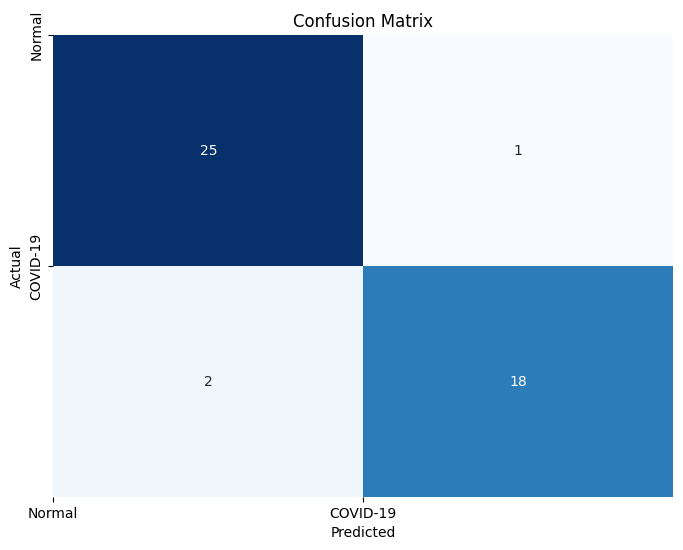

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['Normal', 'COVID-19'])
plt.yticks([0, 1], ['Normal', 'COVID-19'])
plt.title('Confusion Matrix')
plt.show()
